<h1><center>Aprendizaje Automático<br>
    Trabajo práctico Nº 1</center></h3>

<center><b>Primer Cuatrimestre 2019</b></center>

<center><i>Federico Moreno - Sofía Perini - Bianca Picchetti (Comisión 2) </i><center>

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB 

%matplotlib inline

In [2]:
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h3>0. Preparación del dataset</h3>

<h4>Dataset original</h4>

In [4]:
df0 = pd.read_csv('Data_original.csv', sep=";")

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 40 columns):
ID                         1304 non-null float64
Sucursal                   819 non-null object
Año                        1304 non-null float64
Mes                        1304 non-null float64
Trimestre Entrega          1302 non-null float64
Fecha Entrega              1302 non-null object
Cancelado                  1303 non-null object
Capital Entregado          1303 non-null float64
Cantidad Cuotas            1303 non-null float64
Cuotas Sin Vencer          303 non-null float64
Importe Cuota              1303 non-null float64
Cuotas Adeudadas           1304 non-null float64
Deuda a la fecha           1304 non-null float64
Interes                    1303 non-null float64
Interes Mensual            1303 non-null float64
Última Fecha Pago          1304 non-null object
Año de Pago                1304 non-null object
Mes de Pago                1304 non-null object
Dia de Pago        

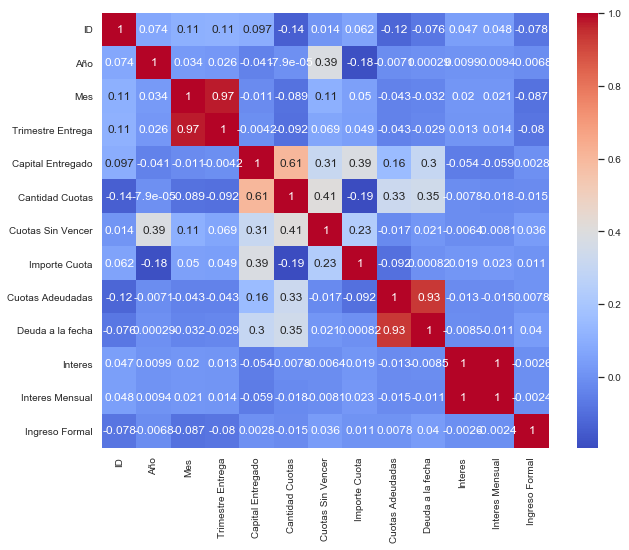

In [6]:
# Tamaño del gráfico en pulgadas
rcParams['figure.figsize'] = 10,8

sns.heatmap(df0.corr(),cmap='coolwarm',annot=True)

Se eliminan las variables (ver Informe):
- ID
- Año de entrega
- Mes de entrega
- Fecha de entrega
- Cancelado
- Cuotas sin vencer
- Cuotas adeudadas
- Deuda a la fecha
- Interes
- Ultima fecha de pago
- Año de pago
- Mes de pago
- Dia de pago
- Trimestre de pago
- Localidad
- Codigo postal
- Fecha de nacimiento
- Nombre de la empresa
- Puesto laboral
- Dirección laboral
- Código postal laboral
- Teléfono laboral

<h4>Dataset final</h4>

In [7]:
df = pd.read_csv('Data_limpio.csv', sep=";")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1134 non-null object
Trimestre Entrega          1276 non-null object
Capital Entregado          1278 non-null int64
Cantidad Cuotas            1278 non-null int64
Importe Cuota              1278 non-null float64
Interes Mensual            1278 non-null float64
Zona Residencia            1222 non-null object
Edad                       1209 non-null float64
Nacionalidad               1278 non-null object
Informa Celular            1278 non-null object
Informa Tel Particular     1278 non-null object
Informa Email              1278 non-null object
Informa Tel Alternativo    1278 non-null object
Informa Nombre Jefe        1278 non-null object
Puesto Laboral             1223 non-null object
Ingreso Formal             1264 non-null float64
Sexo                       1278 non-null object
Target                     1278 non-null object
dtypes: float64(4), int64(2

In [9]:
df.head().T

,0,1,2,3,4
Sucursal,Once,Once,Once,Once,Once
Trimestre Entrega,II,IV,IV,IV,IV
Capital Entregado,5000,8500,10000,28000,10000
Cantidad Cuotas,19,21,21,20,14
Importe Cuota,750,1204,978,4900,1654
Interes Mensual,0.1,0.09,0.05,0.13,0.09
Zona Residencia,Zona Oeste,Zona Oeste,Zona Oeste,Zona Sur,Capital Federal
Edad,62,62,62,62,NaN
Nacionalidad,URUGUAY,URUGUAY,URUGUAY,URUGUAY,ARGENTINA
Informa Celular,SI,SI,SI,SI,SI


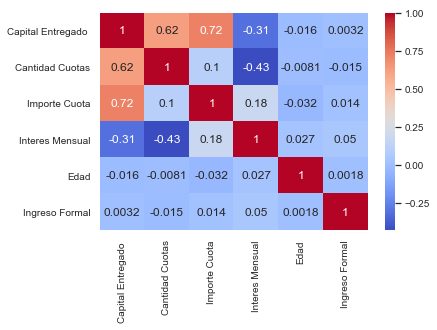

In [10]:
# Gráfico de correlación
rcParams['figure.figsize'] = 6,4
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [11]:
#Porcentaje de nulos por variable en df
(df.isnull().sum().sort_values()/len(df))*100

Nacionalidad                0.000000
Informa Nombre Jefe         0.000000
Informa Tel Alternativo     0.000000
Informa Email               0.000000
Informa Tel Particular      0.000000
Informa Celular             0.000000
Sexo                        0.000000
Target                      0.000000
Interes Mensual             0.000000
Importe Cuota               0.000000
Cantidad Cuotas             0.000000
Capital Entregado           0.000000
Trimestre Entrega           0.156495
Ingreso Formal              1.095462
Puesto Laboral              4.303599
Zona Residencia             4.381847
Edad                        5.399061
Sucursal                   11.267606
dtype: float64

<h4>Pruebas</h4>

Antes de definir el dataset, se efectuaron algunas pruebas para ver cómo proceder con esos datos faltantes. Cabe aclarar que estas pruebas se realizaron antes de particionar el dataset, según se requiere en la consigna 1. del TP (ver más abajo). 

1. Borramos todos los nulos
2. Imputamos la moda en "Sucursal" (para no borrar ese 11% de datos faltantes) y borramos los nulos de las variables numéricas

<h5>Prueba 1: borramos todos los nulos</h5>

In [12]:
# Borramos los nulos. Se crea un nuevo dataframe llamado df1
df1 = df.copy()
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   979 non-null object
Trimestre Entrega          979 non-null object
Capital Entregado          979 non-null int64
Cantidad Cuotas            979 non-null int64
Importe Cuota              979 non-null float64
Interes Mensual            979 non-null float64
Zona Residencia            979 non-null object
Edad                       979 non-null float64
Nacionalidad               979 non-null object
Informa Celular            979 non-null object
Informa Tel Particular     979 non-null object
Informa Email              979 non-null object
Informa Tel Alternativo    979 non-null object
Informa Nombre Jefe        979 non-null object
Puesto Laboral             979 non-null object
Ingreso Formal             979 non-null float64
Sexo                       979 non-null object
Target                     979 non-null object
dtypes: float64(4), int64(2), object(12)
memor

In [13]:
# Porcentaje de nulos por variable en df1
(df1.isnull().sum().sort_values()/len(df1))*100

Sucursal                   0.0
Ingreso Formal             0.0
Puesto Laboral             0.0
Informa Nombre Jefe        0.0
Informa Tel Alternativo    0.0
Informa Email              0.0
Informa Tel Particular     0.0
Informa Celular            0.0
Nacionalidad               0.0
Edad                       0.0
Zona Residencia            0.0
Interes Mensual            0.0
Importe Cuota              0.0
Cantidad Cuotas            0.0
Capital Entregado          0.0
Trimestre Entrega          0.0
Sexo                       0.0
Target                     0.0
dtype: float64

In [14]:
# Lista con las variables categóricas
cat1 = df1.dtypes.loc[df1.dtypes=='object'].index
print(cat1)

Index(['Sucursal', 'Trimestre Entrega', 'Zona Residencia', 'Nacionalidad',
       'Informa Celular', 'Informa Tel Particular', 'Informa Email',
       'Informa Tel Alternativo', 'Informa Nombre Jefe', 'Puesto Laboral',
       'Sexo', 'Target'],
      dtype='object')


In [15]:
def encoder(df, cat):
    le = preprocessing.LabelEncoder()
    clases = []
    for i in cat:
        df[i]=le.fit_transform(df[i]) 
        clases.append(le.classes_)
    return df, clases

In [16]:
# Aplicamos LabelEncoder
dt1, clases1= encoder(df1.copy(), cat1)

In [17]:
# Verificamos las clases
[[c] for c in clases1]

[[array(['Alem', 'Belgrano', 'Once'], dtype=object)],
 [array(['I', 'II', 'III', 'IV'], dtype=object)],
 [array(['Capital Federal', 'Zona Norte', 'Zona Oeste', 'Zona Sur'],
        dtype=object)],
 [array(['ARGENTINA', 'BOLIVIA', 'BRASIL', 'COLOMBIA', 'PARAGUAY', 'PERU',
         'URUGUAY'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO ', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['ADMINISTRACION', 'COMERCIO', 'LIMPIEZA Y SEGURIDAD', 'OPERARIO',
         'PORTERO', 'SALUD'], dtype=object)],
 [array(['F', 'M'], dtype=object)],
 [array(['Cumplidor', 'Deudor'], dtype=object)]]

**Cumplidor:** "0" <br>
**Deudor:** "1"

In [18]:
# Verificamos que esté encodeado
dt1.head()

,Sucursal,Trimestre Entrega,Capital Entregado,Cantidad Cuotas,Importe Cuota,Interes Mensual,Zona Residencia,Edad,Nacionalidad,Informa Celular,Informa Tel Particular,Informa Email,Informa Tel Alternativo,Informa Nombre Jefe,Puesto Laboral,Ingreso Formal,Sexo,Target
0,2,1,5000,19,750.0,0.10,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
1,2,3,8500,21,1204.0,0.09,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
2,2,3,10000,21,978.0,0.05,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
3,2,3,28000,20,4900.0,0.13,3,62.0,6,1,0,0,0,1,2,10000.0,1,0
7,2,1,6000,11,1174.0,0.10,0,40.0,0,1,1,0,1,1,4,11714.0,1,0


In [19]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   979 non-null int32
Trimestre Entrega          979 non-null int32
Capital Entregado          979 non-null int64
Cantidad Cuotas            979 non-null int64
Importe Cuota              979 non-null float64
Interes Mensual            979 non-null float64
Zona Residencia            979 non-null int32
Edad                       979 non-null float64
Nacionalidad               979 non-null int32
Informa Celular            979 non-null int32
Informa Tel Particular     979 non-null int32
Informa Email              979 non-null int32
Informa Tel Alternativo    979 non-null int32
Informa Nombre Jefe        979 non-null int32
Puesto Laboral             979 non-null int32
Ingreso Formal             979 non-null float64
Sexo                       979 non-null int32
Target                     979 non-null int32
dtypes: float64(4), int32(12), int64(2)
memory usage: 99.4

In [20]:
# Hacemos un árbol con dt1
X1 = dt1.drop('Target',axis=1).copy() 
y1 = dt1['Target'].copy()

In [21]:
# Separamos 70-30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=55)

In [22]:
# Armado de un árbol de profundidad 3
dtree1 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree1.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [23]:
# Evaluamos nuestro test
predictions1 = dtree1.predict(X1_test)
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       198
           1       0.41      0.28      0.33        96

   micro avg       0.63      0.63      0.63       294
   macro avg       0.55      0.54      0.54       294
weighted avg       0.60      0.63      0.61       294



In [24]:
# La matriz de confusión
confusion_matrix(y1_test,predictions1)

array([[159,  39],
       [ 69,  27]], dtype=int64)

In [25]:
# La precisión del ajuste
accuracy_score(y1_test, predictions1)

0.6326530612244898

In [26]:
# La lista de features para graficar el árbol
features1 = list(dt1.columns[:-1])

In [27]:
# Gráfico del árbol (se muestra más abajo)
dot_data1 = StringIO()
export_graphviz(dtree1, out_file="tree1.dot",feature_names=features1,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

<h5>Prueba 2: imputamos la moda en "Sucursal" y borramos todos los nulos numéricos</h5>

In [28]:
# Imputación de moda en "Sucursal"
df2 = df.copy()
df2["Sucursal"] = df2["Sucursal"].fillna(df2["Sucursal"].mode().iloc[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1278 non-null object
Trimestre Entrega          1276 non-null object
Capital Entregado          1278 non-null int64
Cantidad Cuotas            1278 non-null int64
Importe Cuota              1278 non-null float64
Interes Mensual            1278 non-null float64
Zona Residencia            1222 non-null object
Edad                       1209 non-null float64
Nacionalidad               1278 non-null object
Informa Celular            1278 non-null object
Informa Tel Particular     1278 non-null object
Informa Email              1278 non-null object
Informa Tel Alternativo    1278 non-null object
Informa Nombre Jefe        1278 non-null object
Puesto Laboral             1223 non-null object
Ingreso Formal             1264 non-null float64
Sexo                       1278 non-null object
Target                     1278 non-null object
dtypes: float64(4), int64(2

In [29]:
# Borramos los nulos de df2
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1101 non-null object
Trimestre Entrega          1101 non-null object
Capital Entregado          1101 non-null int64
Cantidad Cuotas            1101 non-null int64
Importe Cuota              1101 non-null float64
Interes Mensual            1101 non-null float64
Zona Residencia            1101 non-null object
Edad                       1101 non-null float64
Nacionalidad               1101 non-null object
Informa Celular            1101 non-null object
Informa Tel Particular     1101 non-null object
Informa Email              1101 non-null object
Informa Tel Alternativo    1101 non-null object
Informa Nombre Jefe        1101 non-null object
Puesto Laboral             1101 non-null object
Ingreso Formal             1101 non-null float64
Sexo                       1101 non-null object
Target                     1101 non-null object
dtypes: float64(4), int64(2

In [30]:
# Porcentaje de nulos por variable en df2
(df2.isnull().sum().sort_values()/len(df2))*100

Sucursal                   0.0
Ingreso Formal             0.0
Puesto Laboral             0.0
Informa Nombre Jefe        0.0
Informa Tel Alternativo    0.0
Informa Email              0.0
Informa Tel Particular     0.0
Informa Celular            0.0
Nacionalidad               0.0
Edad                       0.0
Zona Residencia            0.0
Interes Mensual            0.0
Importe Cuota              0.0
Cantidad Cuotas            0.0
Capital Entregado          0.0
Trimestre Entrega          0.0
Sexo                       0.0
Target                     0.0
dtype: float64

In [31]:
# Lista con las variables categóricas
cat2 = df2.dtypes.loc[df1.dtypes=='object'].index
print(cat2)

Index(['Sucursal', 'Trimestre Entrega', 'Zona Residencia', 'Nacionalidad',
       'Informa Celular', 'Informa Tel Particular', 'Informa Email',
       'Informa Tel Alternativo', 'Informa Nombre Jefe', 'Puesto Laboral',
       'Sexo', 'Target'],
      dtype='object')


In [32]:
def encoder(df, cat):
    le = preprocessing.LabelEncoder()
    clases = []
    for i in cat:
        df[i]=le.fit_transform(df[i]) 
        clases.append(le.classes_)
    return df, clases

In [33]:
# Aplicamos LabelEncoder
dt2, clases2= encoder(df2.copy(), cat2)

In [34]:
# Verificamos las clases
[[c] for c in clases2]

[[array(['Alem', 'Belgrano', 'Once'], dtype=object)],
 [array(['I', 'II', 'III', 'IV'], dtype=object)],
 [array(['Capital Federal', 'Zona Norte', 'Zona Oeste', 'Zona Sur'],
        dtype=object)],
 [array(['ARGENTINA', 'BOLIVIA', 'BRASIL', 'COLOMBIA', 'PARAGUAY', 'PERU',
         'URUGUAY'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO ', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['ADMINISTRACION', 'COMERCIO', 'LIMPIEZA Y SEGURIDAD', 'OPERARIO',
         'PORTERO', 'SALUD'], dtype=object)],
 [array(['F', 'M'], dtype=object)],
 [array(['Cumplidor', 'Deudor'], dtype=object)]]

**Cumplidor:** "0" <br>
**Deudor:** "1"

In [35]:
# Verificamos que esté encodeado
dt2.head()

,Sucursal,Trimestre Entrega,Capital Entregado,Cantidad Cuotas,Importe Cuota,Interes Mensual,Zona Residencia,Edad,Nacionalidad,Informa Celular,Informa Tel Particular,Informa Email,Informa Tel Alternativo,Informa Nombre Jefe,Puesto Laboral,Ingreso Formal,Sexo,Target
0,2,1,5000,19,750.0,0.10,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
1,2,3,8500,21,1204.0,0.09,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
2,2,3,10000,21,978.0,0.05,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
3,2,3,28000,20,4900.0,0.13,3,62.0,6,1,0,0,0,1,2,10000.0,1,0
7,2,1,6000,11,1174.0,0.10,0,40.0,0,1,1,0,1,1,4,11714.0,1,0


In [36]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1101 non-null int32
Trimestre Entrega          1101 non-null int32
Capital Entregado          1101 non-null int64
Cantidad Cuotas            1101 non-null int64
Importe Cuota              1101 non-null float64
Interes Mensual            1101 non-null float64
Zona Residencia            1101 non-null int32
Edad                       1101 non-null float64
Nacionalidad               1101 non-null int32
Informa Celular            1101 non-null int32
Informa Tel Particular     1101 non-null int32
Informa Email              1101 non-null int32
Informa Tel Alternativo    1101 non-null int32
Informa Nombre Jefe        1101 non-null int32
Puesto Laboral             1101 non-null int32
Ingreso Formal             1101 non-null float64
Sexo                       1101 non-null int32
Target                     1101 non-null int32
dtypes: float64(4), int32(12), int64(2)

In [37]:
# Hacemos un árbol con dt2
X2 = dt2.drop('Target',axis=1).copy()
y2 = dt2['Target'].copy()

In [38]:
# Separamos 70-30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=55)

In [39]:
# Armado de un árbol de profundidad 3
dtree2 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree2.fit(X2_train,y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [40]:
# Evaluamos nuestro test
predictions2 = dtree2.predict(X2_test)
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       209
           1       0.51      0.41      0.45       122

   micro avg       0.64      0.64      0.64       331
   macro avg       0.60      0.59      0.59       331
weighted avg       0.62      0.64      0.63       331



In [41]:
# La matriz de confusión
confusion_matrix(y2_test,predictions2)

array([[161,  48],
       [ 72,  50]], dtype=int64)

In [42]:
# La precisión del ajuste
accuracy_score(y2_test, predictions2)

0.6374622356495468

In [43]:
# Los features para el gráfico del árbol
features2 = list(dt2.columns[:-1])

In [44]:
# Gráfico del árbol
dot_data2 = StringIO()
export_graphviz(dtree2, out_file="tree2.dot",feature_names=features2,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

<h4>Comparamos las pruebas 1 y 2:</h4>

<h5>Prueba 1: se borran absolutamente todos los nulos (~25% de los datos)</h5>

![Árbol prof.3, Gini, nulos borrados (25%](tree1.png)

<h5>Prueba 2: se reemplaza "Sucursal" por la moda y se borran los nulos restante (~15% de los datos)</h5>

![Árbol prof.3, Gini, moda imputada en "sucursal", nulos borrados (15%)](tree2.png)

*En el segundo caso  además de utilizarse más proporción de datos, la accuracy es levemente mayor. Principalmente se observa que la clasificación para "deudores" (de mayor interés para la investigación) tiene precision y recall más altas, por tanto f1-score más alto, es decir, que este segundo modelo clasifica mejor el target sobre el conjunto de datos originales, motivo por el cual se definió que este último dataset era el más apropiado para trabajar.*<br>

<h3>Estudiamos el dataset para ver si está balanceado</h3>

In [45]:
# Vemos si está balanceado el dataset en relacion al target. 
print("Datos totales en el dataset : {}".format(dt2['Target'].count()))

Ones = dt2.groupby('Target')['Target'].count()

print("% de '1' en el dataset (deudores): {}".format(Ones[1]*100.0/len(dt2)))
print("% de '0' en el dataset (pagadores): {}".format(Ones[0]*100.0/len(dt2)))
print("Nro de '1' en total (deudores): {}".format(Ones[1]))
print("Nro de '0' en total (deudores): {}".format(Ones[0]))

Datos totales en el dataset : 1101
% de '1' en el dataset (deudores): 36.6030881017257
% de '0' en el dataset (pagadores): 63.3969118982743
Nro de '1' en total (deudores): 403
Nro de '0' en total (deudores): 698


*Notamos que hay un 75% más de pagadores que de deudores y por lo tanto la muestra esta desbalanceada.*

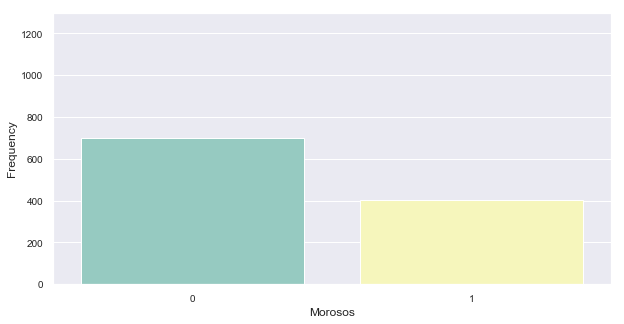

In [46]:
ax = sns.countplot(x = dt2["Target"] ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 1300)
ax.set_xlabel('Morosos')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=1300)

plt.show()

In [47]:
# Se procede a borrar los datos positivos a fin de balancear el dataset, filtrando por target = 1 (deudor) y luego los unimos
t1 = dt2[dt2["Target"]==1].copy()
t0 = dt2[dt2["Target"]==0].copy()
t0s = t0.sample(frac =.577, random_state=55)

t0s.shape

(403, 18)

In [48]:
dt3 = t1.append(t0s)
dt3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 15 to 1205
Data columns (total 18 columns):
Sucursal                   806 non-null int32
Trimestre Entrega          806 non-null int32
Capital Entregado          806 non-null int64
Cantidad Cuotas            806 non-null int64
Importe Cuota              806 non-null float64
Interes Mensual            806 non-null float64
Zona Residencia            806 non-null int32
Edad                       806 non-null float64
Nacionalidad               806 non-null int32
Informa Celular            806 non-null int32
Informa Tel Particular     806 non-null int32
Informa Email              806 non-null int32
Informa Tel Alternativo    806 non-null int32
Informa Nombre Jefe        806 non-null int32
Puesto Laboral             806 non-null int32
Ingreso Formal             806 non-null float64
Sexo                       806 non-null int32
Target                     806 non-null int32
dtypes: float64(4), int32(12), int64(2)
memory usage: 81.

In [49]:
print("Datos totales en el dataset : {}".format(dt3['Target'].count()))

Ones = dt3.groupby('Target')['Target'].count()

print("% de '1' en el dataset (deudores): {}".format(Ones[1]*100.0/len(dt3)))
print("% de '0' en el dataset (pagadores): {}".format(Ones[0]*100.0/len(dt3)))
print("Nro de '1' en total (deudores): {}".format(Ones[1]))
print("Nro de '0' en total (deudores): {}".format(Ones[0]))

Datos totales en el dataset : 806
% de '1' en el dataset (deudores): 50.0
% de '0' en el dataset (pagadores): 50.0
Nro de '1' en total (deudores): 403
Nro de '0' en total (deudores): 403


**Realizamos un árbol con dt3: el dataframe con moda imputada en "sucursal", las variables categóricas encodeadas y balanceado.**

In [50]:
dt3.head(3)

,Sucursal,Trimestre Entrega,Capital Entregado,Cantidad Cuotas,Importe Cuota,Interes Mensual,Zona Residencia,Edad,Nacionalidad,Informa Celular,Informa Tel Particular,Informa Email,Informa Tel Alternativo,Informa Nombre Jefe,Puesto Laboral,Ingreso Formal,Sexo,Target
15,2,2,10000,14,1689.0,0.10,0,40.0,5,1,0,1,0,1,1,9108.0,1,1
16,2,3,12000,14,1985.1,0.09,0,40.0,5,1,0,1,0,1,1,9108.0,1,1
19,2,3,7000,14,1158.0,0.09,0,59.0,0,1,0,0,1,1,2,10000.0,1,1


In [51]:
# Hacemos un árbol con dt3
Xf = dt3.drop('Target',axis=1).copy()
yf = dt3['Target'].copy()

In [52]:
# Separamos 70-30
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.30, random_state=55)

In [53]:
# Armado de un árbol de profundidad 3
dtreef = DecisionTreeClassifier(max_depth=3, random_state=55)
dtreef.fit(Xf_train,yf_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [54]:
# Evaluamos nuestro test
predictionsf = dtreef.predict(Xf_test)
print(classification_report(yf_test,predictionsf))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       117
           1       0.60      0.61      0.61       125

   micro avg       0.59      0.59      0.59       242
   macro avg       0.59      0.59      0.59       242
weighted avg       0.59      0.59      0.59       242



In [55]:
# La matriz de confusión
confusion_matrix(yf_test,predictionsf)

array([[67, 50],
       [49, 76]], dtype=int64)

In [56]:
# La precisión del ajuste
accuracy_score(yf_test, predictionsf)

0.5909090909090909

In [57]:
# Se observa como mejora la performance para la clase deudor, que antes no era buena por el desbalanceo de dataset 
# en favor de la clase cumplidora.

In [58]:
# Los features para el gráfico del árbol
featuresf = list(dt3.columns[:-1])

In [59]:
# Gráfico del árbol
dot_dataf = StringIO()
export_graphviz(dtreef, out_file="treef.dot",feature_names=featuresf,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Gini, balanceado](treef.png)

<h3>1. Partición de datos</h3>

Particionar el conjunto de datos en entrenamiento, validación y test. El conjunto de test se deberá dejar apartado para ser utilizado al final.

In [60]:
# Trabajamos sobre dt3: dataset con moda imputada en sucursal, nulos borrados (15%), balanceado y encodeado
dt3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 15 to 1205
Data columns (total 18 columns):
Sucursal                   806 non-null int32
Trimestre Entrega          806 non-null int32
Capital Entregado          806 non-null int64
Cantidad Cuotas            806 non-null int64
Importe Cuota              806 non-null float64
Interes Mensual            806 non-null float64
Zona Residencia            806 non-null int32
Edad                       806 non-null float64
Nacionalidad               806 non-null int32
Informa Celular            806 non-null int32
Informa Tel Particular     806 non-null int32
Informa Email              806 non-null int32
Informa Tel Alternativo    806 non-null int32
Informa Nombre Jefe        806 non-null int32
Puesto Laboral             806 non-null int32
Ingreso Formal             806 non-null float64
Sexo                       806 non-null int32
Target                     806 non-null int32
dtypes: float64(4), int32(12), int64(2)
memory usage: 81.

In [61]:
dt3.head()

,Sucursal,Trimestre Entrega,Capital Entregado,Cantidad Cuotas,Importe Cuota,Interes Mensual,Zona Residencia,Edad,Nacionalidad,Informa Celular,Informa Tel Particular,Informa Email,Informa Tel Alternativo,Informa Nombre Jefe,Puesto Laboral,Ingreso Formal,Sexo,Target
15,2,2,10000,14,1689.0,0.10,0,40.0,5,1,0,1,0,1,1,9108.0,1,1
16,2,3,12000,14,1985.1,0.09,0,40.0,5,1,0,1,0,1,1,9108.0,1,1
19,2,3,7000,14,1158.0,0.09,0,59.0,0,1,0,0,1,1,2,10000.0,1,1
20,2,3,1774,3,1774.1,0.67,3,52.0,0,1,0,1,0,1,3,16000.0,1,1
22,2,0,8000,11,1565.0,0.10,0,48.0,0,1,1,0,0,1,4,13115.1,1,1


In [62]:
X_final = dt3.drop('Target',axis=1).copy()
y_final = dt3['Target'].copy()

In [63]:
# Separamos 80-20 en "Desarrollo" y "Test"
X_dev, X_testf, y_dev, y_testf = train_test_split(X_final, y_final, test_size=0.20, random_state=55)

A partir de acá usamos X_dev: es el 80% de los datos que separaremos en "entrenamiento" y "validación" para los árboles siguientes.

<h3>2. Árboles de decisión</h3>

**1.** Entrenar un árbol de decisión con altura 3 y el resto de los hiperparámetros con su valor en default. Estimar la performance del modelo utilizando 5-fold cross validation utilizando el Accuracy y ROC AUC. 

Informar para cada fold el Accuracy y ROC AUC para:
- Conjunto de entrenamiento
- Conjunto de validación

Informar promedio y desviación estándar de:
- todos los conjuntos de entrenamiento
- todos los conjuntos de validación

In [64]:
# Definimos los grupos de atributos y target
X3 = X_dev.copy()
y3 = y_dev.copy()

In [65]:
# Separamos en set de entrenamiento y de validación
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.20, random_state=55)

In [66]:
# Entrenamos el árbol
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree3.fit(X3_train,y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [67]:
predictions3 = dtree3.predict(X3_val)
print(classification_report(y3_val,predictions3))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        58
           1       0.63      0.62      0.62        71

   micro avg       0.59      0.59      0.59       129
   macro avg       0.59      0.59      0.59       129
weighted avg       0.59      0.59      0.59       129



In [68]:
# Accuracy
round(accuracy_score(y3_val, predictions3),3)

0.589

In [69]:
# 5-Folds Cross Validation
X = X3.copy()
y = y3.copy()
tree = dtree3
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in k.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
print(acc_list)
print("Accuracy:", round(sum/5,3))

[0.62, 0.581, 0.504, 0.566, 0.625]
Accuracy: 0.579


0.642


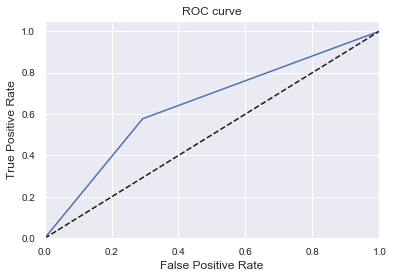

In [70]:
# ROC AUC
predictions = dtree3.predict(X3_val) 
print(round(roc_auc_score(y3_val, predictions),3))

fpr, tpr, _ = roc_curve(y3_val, predictions)

sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<h4>Parametros de cada Fold</h4>

In [71]:
# Separación del dataset X_dev en 5 folds
X_kf = X_dev.copy()
y_kf = y_dev.copy()
k = 5
X_folds = np.array_split(X_kf, k)
y_folds = np.array_split(y_kf, k)

In [72]:
# Separación de cada fold en entrenamiento y validación

# Fold 1
kf1_X_train = X_kf.drop(list(X_folds[0].index.values), axis=0) # al Dataset X_dev le borramos las filas que componen folds[0]
kf1_X_val = X_folds[0]
kf1_y_train = y_kf.drop(list(y_folds[0].index.values), axis=0) # análogamente para el dataset y
kf1_y_val = y_folds[0]

# Fold 2
kf2_X_train = X_kf.drop(list(X_folds[1].index.values), axis=0)
kf2_X_val = X_folds[1]
kf2_y_train = y_kf.drop(list(y_folds[1].index.values), axis=0)
kf2_y_val = y_folds[1]

# Fold 3
kf3_X_train = X_kf.drop(list(X_folds[2].index.values), axis=0)
kf3_X_val = X_folds[2]
kf3_y_train = y_kf.drop(list(y_folds[2].index.values), axis=0)
kf3_y_val = y_folds[2]

# Fold 4
kf4_X_train = X_kf.drop(list(X_folds[3].index.values), axis=0)
kf4_X_val = X_folds[3]
kf4_y_train = y_kf.drop(list(y_folds[3].index.values), axis=0)
kf4_y_val = y_folds[3]

# Fold 5
kf5_X_train = X_kf.drop(list(X_folds[4].index.values), axis=0)
kf5_X_val = X_folds[4]
kf5_y_train = y_kf.drop(list(y_folds[4].index.values), axis=0)
kf5_y_val = y_folds[4]

<h5>Fold 1</h5>

In [73]:
# Entrenamos el árbol del fold 1
dtree_kf1 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree_kf1.fit(kf1_X_train,kf1_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [74]:
# Las predicciones del árbol    
predictions_kf1 = dtree_kf1.predict(kf1_X_val)
print(classification_report(kf1_y_val,predictions_kf1))

              precision    recall  f1-score   support

           0       0.56      0.80      0.66        59
           1       0.73      0.47      0.57        70

   micro avg       0.62      0.62      0.62       129
   macro avg       0.65      0.63      0.62       129
weighted avg       0.65      0.62      0.61       129



In [75]:
# Train Accuracy
acc_kf1_train = accuracy_score(kf1_y_train, dtree_kf1.predict(kf1_X_train))

In [76]:
# Validation Accuracy
acc_kf1_val = accuracy_score(kf1_y_val, predictions_kf1)

In [77]:
# Train ROC AUC Score
roc_kf1_train = roc_auc_score(kf1_y_train, dtree_kf1.predict(kf1_X_train))

In [78]:
# Validation ROC AUC Score
roc_kf1_val = roc_auc_score(kf1_y_val, dtree_kf1.predict(kf1_X_val))

<h5>Fold 2</h5>

In [79]:
# Entrenamos el árbol del fold 2
dtree_kf2 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree_kf2.fit(kf2_X_train,kf2_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [80]:
# Las predicciones del árbol
predictions_kf2 = dtree_kf2.predict(kf2_X_val)
print(classification_report(kf2_y_val,predictions_kf2))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61        62
           1       0.63      0.48      0.54        67

   micro avg       0.58      0.58      0.58       129
   macro avg       0.59      0.59      0.58       129
weighted avg       0.59      0.58      0.58       129



In [81]:
# Train Accuracy
acc_kf2_train = accuracy_score(kf2_y_train, dtree_kf2.predict(kf2_X_train))

In [82]:
# Validation Accuracy
acc_kf2_val = accuracy_score(kf2_y_val, predictions_kf2)

In [83]:
# Train ROC AUC Score
roc_kf2_train = roc_auc_score(kf2_y_train, dtree_kf2.predict(kf2_X_train))

In [84]:
# Validation ROC AUC Score 
roc_kf2_val = roc_auc_score(kf2_y_val, dtree_kf2.predict(kf2_X_val))

<h5>Fold 3</h5>

In [85]:
# Entrenamos el árbol del fold 3
dtree_kf3 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree_kf3.fit(kf3_X_train,kf3_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [86]:
# Las predicciones del árbol
predictions_kf3 = dtree_kf3.predict(kf3_X_val)
print(classification_report(kf3_y_val,predictions_kf3))

              precision    recall  f1-score   support

           0       0.56      0.39      0.46        70
           1       0.47      0.64      0.54        59

   micro avg       0.50      0.50      0.50       129
   macro avg       0.52      0.51      0.50       129
weighted avg       0.52      0.50      0.50       129



In [87]:
# Train Accuracy
acc_kf3_train = accuracy_score(kf3_y_train, dtree_kf3.predict(kf3_X_train))

In [88]:
# Validation Accuracy
acc_kf3_val = accuracy_score(kf3_y_val, predictions_kf3)

In [89]:
# Train ROC AUC Score
roc_kf3_train = roc_auc_score(kf3_y_train, dtree_kf3.predict_proba(kf3_X_train)[:,1])

In [90]:
# Validation ROC AUC Score
roc_kf3_val = roc_auc_score(kf3_y_val, dtree_kf3.predict_proba(kf3_X_val)[:,1])

<h5>Fold 4</h5>

In [91]:
# Entrenamos el árbol del fold 4
dtree_kf4 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree_kf4.fit(kf4_X_train,kf4_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [92]:
# Las predicciones del árbol
predictions_kf4 = dtree_kf4.predict(kf4_X_val)
print(classification_report(kf4_y_val,predictions_kf4))

              precision    recall  f1-score   support

           0       0.58      0.40      0.47        63
           1       0.56      0.73      0.63        66

   micro avg       0.57      0.57      0.57       129
   macro avg       0.57      0.56      0.55       129
weighted avg       0.57      0.57      0.55       129



In [93]:
# Train Accuracy
acc_kf4_train = accuracy_score(kf4_y_train, dtree_kf4.predict(kf4_X_train))

In [94]:
# Validation Accuracy
acc_kf4_val = accuracy_score(kf4_y_val, predictions_kf4)

In [95]:
# Train ROC AUC Score
roc_kf4_train = roc_auc_score(kf4_y_train, dtree_kf4.predict(kf4_X_train))

In [96]:
# Validation ROC AUC Score
roc_kf4_val = roc_auc_score(kf4_y_val, dtree_kf4.predict(kf4_X_val))

<h5>Fold 5</h5>

In [97]:
# Entrenamos el árbol del fold 5
dtree_kf5 = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree_kf5.fit(kf5_X_train,kf5_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [98]:
# Las predicciones del árbol
predictions_kf5 = dtree_kf5.predict(kf5_X_val)
print(classification_report(kf5_y_val,predictions_kf5))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        66
           1       0.65      0.50      0.56        62

   micro avg       0.62      0.62      0.62       128
   macro avg       0.63      0.62      0.62       128
weighted avg       0.63      0.62      0.62       128



In [99]:
# Train Accuracy
acc_kf5_train = accuracy_score(kf5_y_train, dtree_kf5.predict(kf5_X_train))

In [100]:
# Validation Accuracy
acc_kf5_val = accuracy_score(kf5_y_val, predictions_kf5)

In [101]:
# Confusion Matrix
cm_kf5 = confusion_matrix(kf5_y_val, predictions_kf5)

In [102]:
# Train ROC AUC Score
roc_kf5_train = roc_auc_score(kf5_y_train, dtree_kf5.predict(kf5_X_train))

In [103]:
# Validation ROC AUC Score
roc_kf5_val = roc_auc_score(kf5_y_val, dtree_kf5.predict(kf5_X_val))

El promedio de todos los Train y Validation Accuracy:

In [104]:
mean_train_acc = round((acc_kf1_train + acc_kf2_train + acc_kf3_train + acc_kf4_train + acc_kf5_train) / 5 , 3)
mean_val_acc = round((acc_kf1_val + acc_kf2_val + acc_kf3_val + acc_kf4_val + acc_kf5_val) / 5 , 3)
mean_train_roc = round((roc_kf1_train + roc_kf2_train + roc_kf3_train + roc_kf4_train + roc_kf5_train)/5, 3)
mean_val_roc = round((roc_kf1_val + roc_kf2_val + roc_kf3_val + roc_kf4_val + roc_kf5_val)/5, 3)

El desvío estándar de todos los Train y Validation Accuracy:

In [105]:
sd_train_acc = round(np.std([acc_kf1_train, acc_kf2_train, acc_kf3_train, acc_kf4_train, acc_kf5_train], axis=0),3)
sd_val_acc = round(np.std([acc_kf1_val, acc_kf2_val, acc_kf3_val, acc_kf4_val, acc_kf5_val], axis=0),3)
sd_train_roc = round(np.std([roc_kf1_train, roc_kf2_train, roc_kf3_train, roc_kf4_train, roc_kf5_train], axis=0),3)
sd_val_roc = round(np.std([roc_kf1_val, roc_kf2_train, roc_kf3_val, roc_kf4_val, roc_kf5_val], axis=0),3)

Tabla de Accuracy:

In [106]:
Folds = ("Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Promedio", "Desvío Estándar")
Acc_Train = ([acc_kf1_train, acc_kf2_train, acc_kf3_train, acc_kf4_train, acc_kf5_train, mean_train_acc,sd_train_acc])
Acc_Val = ([acc_kf1_val, acc_kf2_val, acc_kf3_val, acc_kf4_val, acc_kf5_val, mean_val_acc, sd_val_acc])
Roc_Train = ([roc_kf1_train, roc_kf2_train, roc_kf3_train, roc_kf4_train, roc_kf5_train, mean_train_roc, sd_train_roc])
Roc_Val = ([roc_kf1_val, roc_kf2_train, roc_kf3_val, roc_kf4_val, roc_kf5_val, mean_val_roc, sd_val_roc])
Tabla = pd.DataFrame({"Folds": Folds, "Accuracy Training": Acc_Train, "Accuracy Validation": Acc_Val, "ROC AUC Training": Roc_Train, "ROC AUC Validation": Roc_Val})

Tabla.round(3)

,Folds,Accuracy Training,Accuracy Validation,ROC AUC Training,ROC AUC Validation
0,Fold 1,0.641,0.620,0.638,0.634
1,Fold 2,0.650,0.581,0.650,0.650
2,Fold 3,0.641,0.504,0.705,0.571
3,Fold 4,0.637,0.566,0.637,0.562
4,Fold 5,0.640,0.625,0.641,0.621
5,Promedio,0.642,0.579,0.654,0.595
6,Desvío Estándar,0.005,0.044,0.026,0.035


**2.** Entrenar árboles de decisión con las siguientes combinaciones. En todos los casos probar e informar Accuracy y ROC AUC para training y para validación con Gini y con Information Gain haciendo cross validation.

<span style="padding-left:2em">**a.** Altura máxima 3</span>

In [107]:
# Definimos los grupos de atributos y target
X3b = X_dev.copy()
y3b = y_dev.copy()

In [108]:
# Separamos en set de entrenamiento y de validación
X3b_train, X3b_val, y3b_train, y3b_val = train_test_split(X3b, y3b, test_size=0.20, random_state=55)

<h4>Gini</h4>

In [109]:
# Entrenamos el árbol
dtree3g = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree3g.fit(X3b_train,y3b_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [110]:
# Classification Report
predictions3g = dtree3g.predict(X3b_val)
print(classification_report(y3b_val,predictions3g))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        58
           1       0.63      0.62      0.62        71

   micro avg       0.59      0.59      0.59       129
   macro avg       0.59      0.59      0.59       129
weighted avg       0.59      0.59      0.59       129



In [111]:
# Confusion Matrix
cm3g = confusion_matrix(y3b_val, predictions3g)
print(cm3g)

[[32 26]
 [27 44]]


In [112]:
# Train Accuracy
acc_train3g = accuracy_score(y3b_train, dtree3g.predict(X3b_train))

# Train Recall
rec_train3g = recall_score(y3b_train, dtree3g.predict(X3b_train)) 

# Train Precision
prec_train3g = precision_score(y3b_train, dtree3g.predict(X3b_train))

In [113]:
# Validation Accuracy
acc_val3g = accuracy_score(y3b_val, dtree3g.predict(X3b_val))

# Validation Recall
rec_val3g = recall_score(y3b_val, dtree3g.predict(X3b_val)) 

# Validation Precision
prec_val3g = precision_score(y3b_val, dtree3g.predict(X3b_val))

In [114]:
# Train ROC AUC Score
roc_train3g = roc_auc_score(y3b_train, dtree3g.predict(X3b_train))

In [115]:
# Validation ROC AUC Score
roc_val3g = roc_auc_score(y3b_val, dtree3g.predict(X3b_val))

In [116]:
# Train 5-Folds Cross Validation
X = X3b_train.copy()
y = y3b_train.copy()
tree = dtree3g
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_train3g = sum/5
print(acc_list)
print("Accuracy:", round(cv_train3g,3))

[0.456, 0.641, 0.544, 0.612, 0.563]
Accuracy: 0.563


In [117]:
# Validation 5-Folds Cross Validation
X = X3b_val.copy()
y = y3b_val.copy()
tree = dtree3g
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_val3g = sum/5
print(acc_list)
print("Accuracy:", round(cv_val3g,3))

[0.577, 0.654, 0.654, 0.538, 0.56]
Accuracy: 0.597


<h4>Information Gain</h4>

In [118]:
dtree3e = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=55)
dtree3e.fit(X3b_train,y3b_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [119]:
# Classification Report
predictions3e = dtree3e.predict(X3b_val)
print(classification_report(y3b_val, predictions3e))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        58
           1       0.63      0.62      0.62        71

   micro avg       0.59      0.59      0.59       129
   macro avg       0.59      0.59      0.59       129
weighted avg       0.59      0.59      0.59       129



In [120]:
# Confusion Matrix
cm3e = confusion_matrix(y3b_val, predictions3e)
print(cm3e)

[[32 26]
 [27 44]]


In [121]:
# Train Accuracy
acc_train3e = accuracy_score(y3b_train, dtree3e.predict(X3b_train))

# Train Recall
rec_train3e = recall_score(y3b_train, dtree3e.predict(X3b_train)) 

# Train Precision
prec_train3e = precision_score(y3b_train, dtree3e.predict(X3b_train))

In [122]:
# Validation Accuracy
acc_val3e = accuracy_score(y3b_val, dtree3e.predict(X3b_val))

# Validation Recall
rec_val3e = recall_score(y3b_val, dtree3e.predict(X3b_val)) 

# Validation Precision
prec_val3e = precision_score(y3b_val, dtree3e.predict(X3b_val))

In [123]:
# Train ROC AUC Score
roc_train3e = roc_auc_score(y3b_train, dtree3e.predict(X3b_train))

In [124]:
# Validation ROC AUC Score
roc_val3e = roc_auc_score(y3b_val, dtree3e.predict(X3b_val))

In [125]:
# Train 5-Folds Cross Validation
X = X3b_train.copy()
y = y3b_train.copy()
tree = dtree3e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_train3e = sum/5
print(acc_list)
print("Accuracy:", round(cv_train3e,3))

[0.447, 0.621, 0.544, 0.612, 0.563]
Accuracy: 0.557


In [126]:
# Validation 5-Folds Cross Validation
X = X3b_val.copy()
y = y3b_val.copy()
tree = dtree3e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_val3e = sum/5
print(acc_list)
print("Accuracy:", round(cv_val3e,3))

[0.577, 0.615, 0.654, 0.538, 0.6]
Accuracy: 0.597


<span style="padding-left:2em">**b.** Altura máxima 6</span>

In [127]:
# Definimos los grupos de atributos y target
X6 = X_dev.copy()
y6 = y_dev.copy()

In [128]:
# Separamos en set de entrenamiento y de validación
X6_train, X6_val, y6_train, y6_val = train_test_split(X6, y6, test_size=0.20, random_state=55)

<h4>Gini</h4>

In [129]:
# Entrenamos el árbol
dtree6g = DecisionTreeClassifier(max_depth=6, random_state=55)
dtree6g.fit(X6_train,y6_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [130]:
# Classification Report
predictions6g = dtree6g.predict(X6_val)
print(classification_report(y6_val,predictions6g))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54        58
           1       0.62      0.61      0.61        71

   micro avg       0.58      0.58      0.58       129
   macro avg       0.58      0.58      0.58       129
weighted avg       0.58      0.58      0.58       129



In [131]:
# Confusion Matrix
cm6g = confusion_matrix(y6_val, predictions6g)
print(cm6g)

[[32 26]
 [28 43]]


In [132]:
# Train Accuracy
acc_train6g = accuracy_score(y6_train, dtree6g.predict(X6_train))

# Train Recall
rec_train6g = recall_score(y6_train, dtree6g.predict(X6_train)) 

# Train Precision
prec_train6g = precision_score(y6_train, dtree6g.predict(X6_train))

In [133]:
# Validation Accuracy
acc_val6g = accuracy_score(y6_val, dtree6g.predict(X6_val))

# Validation Recall
rec_val6g = recall_score(y6_val, dtree6g.predict(X6_val))

# Validation Precision
prec_val6g = precision_score(y6_val, dtree6g.predict(X6_val))

In [134]:
# Train ROC AUC Score
roc_train6g = roc_auc_score(y6_train, dtree6g.predict(X6_train))

In [135]:
# Validation ROC AUC Score
roc_val6g = roc_auc_score(y6_val, dtree6g.predict(X6_val))

In [136]:
# Train 5-Folds Cross Validation
X = X6_train.copy()
y = y6_train.copy()
tree = dtree6g
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_train6g = sum/5
print(acc_list)
print("Accuracy:", round(cv_train6g,3))

[0.524, 0.66, 0.563, 0.573, 0.534]
Accuracy: 0.571


In [137]:
# Validation 5-Folds Cross Validation
X = X6_val.copy()
y = y6_val.copy()
tree = dtree6g
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_val6g = sum/5
print(acc_list)
print("Accuracy:", round(cv_val6g,3))

[0.538, 0.385, 0.615, 0.462, 0.52]
Accuracy: 0.504


<h4>Information Gain</h4>

In [138]:
dtree6e = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=55)
dtree6e.fit(X6_train,y6_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [139]:
# Classification Report
predictions6e = dtree6e.predict(X6_val)
print(classification_report(y6_val,predictions6e))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        58
           1       0.64      0.61      0.62        71

   micro avg       0.60      0.60      0.60       129
   macro avg       0.60      0.60      0.59       129
weighted avg       0.60      0.60      0.60       129



In [140]:
# Confusion Matrix
cm6e = confusion_matrix(y6_val, predictions6e)
print(cm6e)

[[34 24]
 [28 43]]


In [141]:
# Train Accuracy
acc_train6e = accuracy_score(y6_train, dtree6e.predict(X6_train))

# Train Recall
rec_train6e = recall_score(y6_train, dtree6e.predict(X6_train)) 

# Train Precision
prec_train6e = precision_score(y6_train, dtree6e.predict(X6_train))

In [142]:
# Validation Accuracy
acc_val6e = accuracy_score(y6_val, dtree6e.predict(X6_val))

# Validation Recall
rec_val6e = recall_score(y6_val, dtree6e.predict(X6_val)) 

# Validation Precision
prec_val6e = precision_score(y6_val, dtree6e.predict(X6_val))

In [143]:
# Train ROC AUC Score
roc_train6e = roc_auc_score(y6_train, dtree6e.predict(X6_train))

In [144]:
# Validation ROC AUC Score
roc_val6e = roc_auc_score(y6_val, dtree6e.predict(X6_val))

In [145]:
# Train 5-Folds Cross Validation
X = X6_train.copy()
y = y6_train.copy()
tree = dtree6e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_train6e = sum/5
print(acc_list)
print("Accuracy:", round(cv_train6e,3))

[0.544, 0.592, 0.563, 0.573, 0.573]
Accuracy: 0.569


In [146]:
# Validation 5-Folds Cross Validation
X = X6_val.copy()
y = y6_val.copy()
tree = dtree6e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_val6e = sum/5
print(acc_list)
print("Accuracy:", round(cv_val6e,3))

[0.538, 0.538, 0.5, 0.577, 0.56]
Accuracy: 0.543


<span style="padding-left:2em">**c.** Sin límite de altura máxima</span>

In [147]:
# Definimos los grupos de atributos y target
XU = X_dev.copy()
yU = y_dev.copy()

In [148]:
# Separamos en set de entrenamiento y de validación
XU_train, XU_val, yU_train, yU_val = train_test_split(XU, yU, test_size=0.20, random_state=55)

<h4>Gini</h4>

In [149]:
# Entrenamos el árbol
dtreeUg = DecisionTreeClassifier(random_state=55)
dtreeUg.fit(XU_train,yU_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [150]:
# Classification Report
predictionsUg = dtreeUg.predict(XU_val)
print(classification_report(yU_val,predictionsUg))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        58
           1       0.57      0.56      0.57        71

   micro avg       0.53      0.53      0.53       129
   macro avg       0.52      0.52      0.52       129
weighted avg       0.53      0.53      0.53       129



In [151]:
# Confusion Matrix
cmUg = confusion_matrix(yU_val, predictionsUg)
print(cmUg)

[[28 30]
 [31 40]]


In [152]:
# Train Accuracy
acc_trainUg = accuracy_score(yU_train, dtreeUg.predict(XU_train))

# Train Recall
rec_trainUg = recall_score(yU_train, dtreeUg.predict(XU_train)) 

# Train Precision
prec_trainUg = precision_score(yU_train, dtreeUg.predict(XU_train))

In [153]:
# Validation Accuracy
acc_valUg = accuracy_score(yU_val, dtreeUg.predict(XU_val))

# Validation Recall
rec_valUg = recall_score(yU_val, dtreeUg.predict(XU_val)) 

# Validation Precision
prec_valUg = precision_score(yU_val, dtreeUg.predict(XU_val))

In [154]:
# Train ROC AUC Score
roc_trainUg = roc_auc_score(yU_train, dtreeUg.predict(XU_train))

In [155]:
# Validation ROC AUC Score
roc_valUg = roc_auc_score(yU_val, dtreeUg.predict(XU_val))

In [156]:
# Train 5-Folds Cross Validation
X = XU_train.copy()
y = yU_train.copy()
tree = dtreeUg
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_trainUg = sum/5
print(acc_list)
print("Accuracy:", round(cv_trainUg,3))

[0.437, 0.544, 0.563, 0.573, 0.563]
Accuracy: 0.536


In [157]:
# Validation 5-Folds Cross Validation
X = XU_val.copy()
y = yU_val.copy()
tree = dtreeUg
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_valUg = sum/5
print(acc_list)
print("Accuracy:", round(cv_valUg,3))

[0.615, 0.5, 0.692, 0.462, 0.56]
Accuracy: 0.566


<h4>Information Gain</h4>

In [158]:
dtreeUe = DecisionTreeClassifier(criterion="entropy", random_state=55)
dtreeUe.fit(XU_train,yU_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [159]:
# Classification Report
predictionsUe = dtreeUe.predict(XU_val)
print(classification_report(yU_val,predictionsUe))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        58
           1       0.58      0.61      0.59        71

   micro avg       0.54      0.54      0.54       129
   macro avg       0.54      0.54      0.54       129
weighted avg       0.54      0.54      0.54       129



In [160]:
# Confusion Matrix
cmUe = confusion_matrix(yU_val, predictionsUe)
print(cmUe)

[[27 31]
 [28 43]]


In [161]:
# Train Accuracy
acc_trainUe = accuracy_score(yU_train, dtreeUe.predict(XU_train))

# Train Recall
rec_trainUe = recall_score(yU_train, dtreeUe.predict(XU_train)) 

# Train Precision
prec_trainUe = precision_score(yU_train, dtreeUe.predict(XU_train))

In [162]:
# Validation Accuracy
acc_valUe = accuracy_score(yU_val, dtreeUe.predict(XU_val))

# Validation Recall
rec_valUe = recall_score(yU_val, dtreeUe.predict(XU_val)) 

# Validation Precision
prec_valUe = precision_score(yU_val, dtreeUe.predict(XU_val))

In [163]:
# Train ROC AUC Score
roc_trainUe = roc_auc_score(yU_train, dtreeUe.predict(XU_train))

In [164]:
# Validation ROC AUC Score
roc_valUe = roc_auc_score(yU_val, dtreeUe.predict(XU_val))

In [165]:
# Train 5-Folds Cross Validation
X = XU_train.copy()
y = yU_train.copy()
tree = dtreeUe
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_trainUe = sum/5
print(acc_list)
print("Accuracy:", round(cv_trainUe,3))

[0.476, 0.524, 0.534, 0.544, 0.583]
Accuracy: 0.532


In [166]:
# Validation 5-Folds Cross Validation
X = XU_val.copy()
y = yU_val.copy()
tree = dtreeUe
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_valUe = sum/5
print(acc_list)
print("Accuracy:", round(cv_valUe,3))

[0.577, 0.654, 0.462, 0.423, 0.56]
Accuracy: 0.535


In [167]:
# Esto es para ver a qué profundidad llegó => aprox. 16
featuresU = list(dt3.columns[:-1])
dot_data = StringIO()
export_graphviz(dtreeUe, out_file=None)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 11.5\\nentropy = 0.99\\nsamples = 104\\nvalue = [46, 58]"] ;\n1 [label="X[0] <= 1.5\\nentropy = 0.869\\nsamples = 31\\nvalue = [22, 9]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]"] ;\n1 -> 2 ;\n3 [label="X[2] <= 17500.0\\nentropy = 0.931\\nsamples = 26\\nvalue = [17, 9]"] ;\n1 -> 3 ;\n4 [label="X[15] <= 21493.0\\nentropy = 0.966\\nsamples = 23\\nvalue = [14, 9]"] ;\n3 -> 4 ;\n5 [label="X[15] <= 9402.15\\nentropy = 0.852\\nsamples = 18\\nvalue = [13, 5]"] ;\n4 -> 5 ;\n6 [label="X[15] <= 7338.0\\nentropy = 0.985\\nsamples = 7\\nvalue = [3, 4]"] ;\n5 -> 6 ;\n7 [label="X[15] <= 5844.5\\nentropy = 0.811\\nsamples = 4\\nvalue = [3, 1]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 2\\nvalue = [2, 0]"] ;\n7 -> 8 ;\n9 [label="X[7] <= 50.0\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n7 -> 9 ;\n10 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;

<h3>Tabla comparativa de medidas de performance</h3>

In [168]:
Modelo = ("Arbol altura 3 Gini", "Árbol altura 6 Gini", "Árbol altura sin límite Gini", "Arbol altura 3 Info Gain", "Árbol altura 6 Info Gain", "Árbol altura sin límite Info Gain")
Acc_Train = ([acc_train3g, acc_train6g, acc_trainUg, acc_train3e, acc_train6e, acc_trainUe])
Acc_Val = ([acc_val3g, acc_val6g, acc_valUg, acc_val3e, acc_val6e, acc_valUe])
Roc_Train = ([roc_train3g, roc_train6g, roc_trainUg, roc_train3e, roc_train6e, roc_trainUe])         
Roc_Val = ([roc_val3g, roc_val6g, roc_valUg, roc_val3e, roc_val6e, roc_valUe])
CV_Train = ([cv_train3g, cv_train6g, cv_trainUg, cv_train3e, cv_train6e, cv_trainUe])          
CV_Val = ([cv_val3g, cv_val6g, cv_valUg, cv_val3e, cv_val6e, cv_valUe])

Tabla1 = pd.DataFrame({"Modelo": Modelo, "Accuracy Training": Acc_Train, "Accuracy Validation": Acc_Val, "ROC AUC Training": Roc_Train, "ROC AUC Validation": Roc_Val, "5-Folds CV Training": CV_Train, "5-Folds CV Validation": CV_Val})

Tabla1['Promedio'] = Tabla1.mean(axis=1)
Tabla1['Desvío'] = Tabla1.std(axis=1)

Tabla1.round(3)

,Modelo,Accuracy Training,Accuracy Validation,ROC AUC Training,ROC AUC Validation,5-Folds CV Training,5-Folds CV Validation,Promedio,Desvío
0,Arbol altura 3 Gini,0.662,0.589,0.662,0.586,0.563,0.597,0.610,0.038
1,Árbol altura 6 Gini,0.759,0.581,0.758,0.579,0.571,0.504,0.625,0.098
2,Árbol altura sin límite Gini,1.000,0.527,1.000,0.523,0.536,0.566,0.692,0.218
3,Arbol altura 3 Info Gain,0.662,0.589,0.662,0.586,0.557,0.597,0.609,0.040
4,Árbol altura 6 Info Gain,0.724,0.597,0.723,0.596,0.569,0.543,0.625,0.072
5,Árbol altura sin límite Info Gain,1.000,0.543,1.000,0.536,0.532,0.535,0.691,0.219


In [169]:
performance_train3g = [acc_train3g, rec_train3g, prec_train3g, roc_train3g, cv_train3g]
performance_val3g = [acc_val3g, rec_val3g, prec_val3g, roc_val3g, cv_val3g]
performance_train3e = [acc_train3e, rec_train3e, prec_train3e, roc_train3e, cv_train3e]
performance_val3e = [acc_val3e, rec_val3e, prec_val3e, roc_val3e, cv_val3e]

performance_train6g = [acc_train6g, rec_train6g, prec_train6g, roc_train6g, cv_train6g]
performance_val6g = [acc_val6g, rec_val6g, prec_val6g, roc_val6g, cv_val6g]
performance_train6e = [acc_train6e, rec_train6e, prec_train6e, roc_train6e, cv_train6e]
performance_val6e = [acc_val6e, rec_val6e, prec_val6e, roc_val6e, cv_val6e]

performance_trainUg = [acc_trainUg, rec_trainUg, prec_trainUg, roc_trainUg, cv_trainUg]
performance_valUg = [acc_valUg, rec_valUg, prec_valUg, roc_valUg, cv_valUg]
performance_trainUe = [acc_trainUe, rec_trainUe, prec_trainUe, roc_trainUe, cv_trainUe]
performance_valUe = [acc_valUe, rec_valUe, prec_valUe, roc_valUe, cv_valUe]

In [170]:
Medida = ("Accuracy", "Recall (1)", "Precision (1)", "ROC-AUC", "5-folds CV")

Tabla_per = pd.DataFrame({"Medida": Medida,
                       #"3 Gini Train": performance_train3g, "6 Gini Train": performance_train6g, "Ultd. Gini Train": performance_trainUg,
                        #"3 IG Train": performance_train3e, "6 IG Train": performance_train6e,  "Ultd. IG Train": performance_trainUe,
                         "3 Gini Val": performance_val3g,  "6 Gini Val": performance_val6g, "Ultd. Gini Val": performance_valUg,
                          "3 IG Val": performance_val3e, "6 IG Val": performance_val6e, "Ultd. IG Val": performance_valUe})

round(Tabla_per,3)

,Medida,3 Gini Val,6 Gini Val,Ultd. Gini Val,3 IG Val,6 IG Val,Ultd. IG Val
0,Accuracy,0.589,0.581,0.527,0.589,0.597,0.543
1,Recall (1),0.620,0.606,0.563,0.620,0.606,0.606
2,Precision (1),0.629,0.623,0.571,0.629,0.642,0.581
3,ROC-AUC,0.586,0.579,0.523,0.586,0.596,0.536
4,5-folds CV,0.597,0.504,0.566,0.597,0.543,0.535


**Graficamos el árbol que mejor dio en validation: profundidad 3**

In [171]:
# Gini
features3g = list(dt3.columns[:-1])
dot_data = StringIO()
export_graphviz(dtree3g, out_file="tree3gini.dot",feature_names=features3g,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Gini](tree3gini.png)

In [172]:
# Information Gain
features3e = list(dt3.columns[:-1])
dot_data = StringIO()
export_graphviz(dtree3e, out_file="tree3entropia.dot",feature_names=features3e,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Information Gain](tree3entropia.png)

<h3>3. Tratamiento de datos faltantes</h3>

*La función para implementación de datos faltantes deberá tomar como parámetros de entrada el dataset, el porcentaje de faltantes y la estrategia de relleno. La salida generará los datos de entrada con los datos faltantes rellenados correspondientemente. Si el dataset utilizado no contiene datos faltantes, generarlos adrede. Construir una familia de datasets agregando datos faltantes para cada estrategia de relleno sobre el 80% de los datos desarrollo. Preservar un 20% sin alterar para las corridas de validación. Variar desde 0% a 80% en intervalos de 5%.*

Probar las siguientes alternativas para completar los datos faltantes:

In [173]:
X_m = X_dev.copy()
y_m = y_dev.copy()
X_trainm, X_valm, y_trainm, y_valm = train_test_split(X_m, y_m, test_size=0.20, random_state=55)

<span style="padding-left:2em">**3.1.** Moda: se rellena el dato faltante con la moda del atributo.</span>

In [174]:
faltantes = [0, 5, 10, 15, 20, 25, 30, 35, 40 ,45, 50, 55, 60, 65, 70, 75, 80]

In [175]:
# Función que calcula las modas:
def moda(df):
    moda = []
    for column in df.columns:
        moda.append(df[column].mode()[0])
    return moda
    
# Función para rellenar con la moda del atributo los valores faltantes
def fill_mode(df, na):
    np.random.seed(seed=55)
    modas = moda(df) 
    df = df.mask(np.random.random(df.shape) < (na/100))
    for (column, i) in zip(df.columns, modas):       
        df[column].fillna(i, inplace=True)  
    return df

<span style="padding-left:3em">**a.** Ejecutar corridas del mejor método del punto 2</span>

*Usamos "dtree3g", arbol de altura 3 con Gini.*

In [176]:
# x: los atributos
# y1: la variable "Target"
# missing: porcentaje de faltantes
# modelo: el modelo a ejecutar
# xval: atributos de validacion
# yval: target de validacion

def arbol(xtrain,ytrain,missing, modelo, xval, yval):
    accuracy = []
    size = []
    for j in missing:
        model = modelo
        X = fill_mode(xtrain, j)
        y = ytrain
        s = model.fit(X,y).tree_.node_count   
        acc = round(accuracy_score(yval, model.predict(xval)),2)
        size.append(s)
        accuracy.append(acc)
    return size, accuracy

In [177]:
size, accuracy = arbol(X_trainm.copy(), y_trainm.copy(), faltantes, dtree3g, X_valm.copy(), y_valm.copy())

In [178]:
Imp_moda = pd.DataFrame({"% aprox. de faltantes": faltantes, "Tamaño": size, "Accuracy": accuracy})
Imp_moda

,% aprox. de faltantes,Tamaño,Accuracy
0,0,15,0.59
1,5,15,0.63
2,10,15,0.63
3,15,15,0.62
4,20,15,0.60
5,25,15,0.64
6,30,15,0.60
7,35,15,0.62
8,40,11,0.59
9,45,15,0.60


<span style="padding-left:3em">**b.** Graficar el tamaño del árbol en función del porcentaje de faltantes</span>

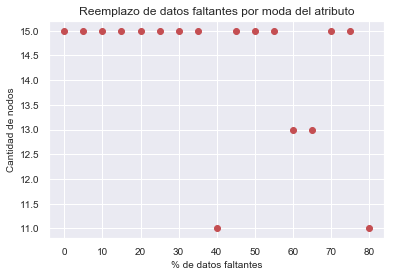

In [179]:
plt.plot(faltantes, size, "ro")
plt.xlabel('% de datos faltantes',fontsize=10)
plt.ylabel('Cantidad de nodos',fontsize=10)
plt.title('Reemplazo de datos faltantes por moda del atributo',fontsize=12)
plt.show()

<span style="padding-left:3em">**c.** Graficar la performance (en Accuracy) en función del porcentaje de faltantes. Utilizar el 20% de datos inalterados para validación.</span>

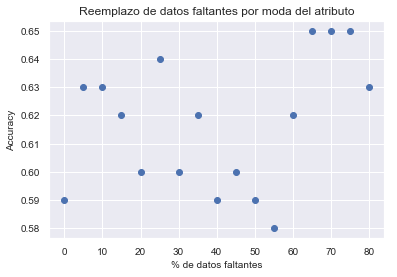

In [180]:
plt.plot(faltantes, accuracy, "bo")
plt.xlabel('% de datos faltantes',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Reemplazo de datos faltantes por moda del atributo',fontsize=12)
plt.show()

<span style="padding-left:3em">**d.** Analizar el tratamiento de datos faltantes de las distintas estrategias sobre los resultados obtenidos.</span>

In [181]:
# Ver informe

In [182]:
# Dataset con 80% de faltantes, reemplazados por moda de atributo
df80at = fill_mode(X_trainm.copy(), 80)

In [183]:
# Hacemos el árbol para el dtaset con 80% de faltantes, reemplazados por moda de atributo
dtree80at = DecisionTreeClassifier(max_depth=3, random_state=55)

# Entrenamos el árbol con el dataset modificado
X80 = df80at.copy()
y80 = y_trainm.copy()
dtree80at.fit(X80,y80)

# Evaluamos con el dataset sin modificar
round(accuracy_score(y_valm, dtree80at.predict(X_valm)),2)

0.63

In [184]:
features80at = list(dt3.columns[:-1])
dot_data80at = StringIO()
export_graphviz(dtree80at, out_file="moda_atributo80.dot",feature_names=features80at,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Information Gain](moda_atributo80.png)

<span style="padding-left:2em">**3.2.** Moda de clase: se rellena el dato faltante con la moda del atributo según la clase.</span>

In [185]:
# Nuestro set de desarrollo
nn = X_dev.copy()
nn["Target"] = y_dev.copy()

# Separamos un 20% para validación (no lo modificamos) y un 80% para insertarle ruido
valn, trainn = np.split(nn, [int(0.2*len(nn))])
x_valn = valn.drop("Target",1).copy()
y_valn = valn["Target"].copy()

# Preparamos trainn (80%) para modificarlos
t1 = trainn[trainn["Target"]==1].copy()
t1 = t1.drop("Target",1)

t0 = trainn[trainn["Target"]==0].copy()
t0 = t0.drop("Target",1)

target = trainn["Target"].copy()

In [186]:
# x0: el dataframe de clase 0
# x1: el dataframe de clase 1
# y1: la variable "Target"
# missing: porcentaje de faltantes
# modelo: el modelo a ejecutar
# xvaln: atributos de validación
# yvaln: target de validación

def arbol_Clase(x0, x1, y1, missing, modelo, xvaln, yvaln):
    accuracy_C = []
    size_C = []
    for j in missing:
        model = modelo
        T0 = fill_mode(x0,j)
        T1 = fill_mode(x1,j)
        X = T0.append(T1)
        s_c = model.fit(X,y1).tree_.node_count   
        acc_c = round(accuracy_score(yvaln, model.predict(xvaln)),2)
        size_C.append(s_c)
        accuracy_C.append(acc_c)
    return size_C, accuracy_C

<span style="padding-left:3em">**a.** Ejecutar corridas del mejor método del punto 2.</span>

In [187]:
size_C, accuracy_C = arbol_Clase(t0.copy(), t1.copy(), target.copy(), faltantes, dtree3g, x_valn, y_valn)

In [188]:
Imp_moda_clase = pd.DataFrame({"% aprox. de faltantes": faltantes, "Tamaño": size_C, "Accuracy": accuracy_C})
Imp_moda_clase

,% aprox. de faltantes,Tamaño,Accuracy
0,0,15,0.53
1,5,15,0.50
2,10,15,0.53
3,15,15,0.55
4,20,15,0.55
5,25,13,0.53
6,30,15,0.50
7,35,13,0.48
8,40,13,0.52
9,45,15,0.53


<span style="padding-left:3em">**b.** Graficar el tamaño del árbol en función del porcentaje de faltantes.</span>

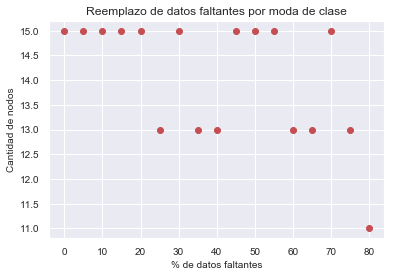

In [189]:
plt.plot(faltantes, size_C, "ro")
plt.xlabel('% de datos faltantes',fontsize=10)
plt.ylabel('Cantidad de nodos',fontsize=10)
plt.title('Reemplazo de datos faltantes por moda de clase',fontsize=12)
plt.show()

<span style="padding-left:3em">**c.** Graficar la performance (en Accuracy) en función del porcentaje de faltantes. Utilizar el 20% de datos inalterados para validación.</span>

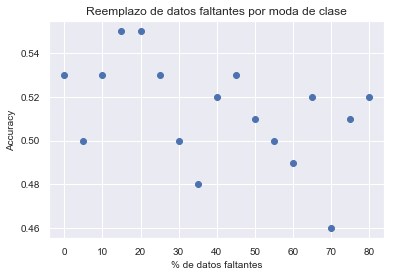

In [190]:
plt.plot(faltantes, accuracy_C, "bo")
plt.xlabel('% de datos faltantes',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Reemplazo de datos faltantes por moda de clase',fontsize=12)
plt.show()

<span style="padding-left:3em">**d.** Analizar el tratamiento de datos faltantes de las distintas estrategias sobre los resultados obtenidos.</span>

In [191]:
# Ver informe

In [192]:
def moda_Clase(x0, x1, missing):
    for j in missing:
        T0 = fill_mode(x0,j)
        T1 = fill_mode(x1,j)
        X = T0.append(T1)
        return X

In [193]:
#  Dataset con 80% de faltantes, reemplazados por moda de clase
df80c = moda_Clase(t0.copy(), t1.copy(), [80])
df80c.shape

(516, 17)

In [194]:
# Hacemos el árbol para el dtaset con 80% de faltantes, reemplazados por moda de clase
dtree80c = DecisionTreeClassifier(max_depth=3, random_state=55)

X80c = df80c.copy()
y80c = target.copy()
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=55)

dtree80c.fit(X80c,y80c)
round(accuracy_score(y_valn, dtree80c.predict(x_valn)),2)

0.52

In [195]:
features80c = list(dt3.columns[:-1])
dot_data80c = StringIO()
export_graphviz(dtree80c, out_file="moda_clase80.dot",feature_names=features80c,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Information Gain](moda_clase80.png)

<h3>4. Tolerancia al ruido. Se deberá implementar una función que introduzca ruido (cambio de un valor) sobre un atributo numérico.</h3>

Para este experimento se deberá implementar una función **ind_ruido**, que toma como parámetros de entrada el dataset y el porcentaje de ruido a introducir sobre la clase.

*Se introduce ruido en "Interes mensual" que es la variable que más separa para el árbol de profundidad 3 con Gini.*

In [196]:
X_r = X_dev.copy()
y_r = y_dev.copy()
X_trainr, X_valr, y_trainr, y_valr = train_test_split(X_r, y_r, test_size=0.20, random_state=55)

<span style="padding-left:3em">**a.** Construir una familia de datasets generando ruido. Preservar un 20% sin alterar para las corridas de validación.</span><br>
<span style="padding-left:3em">Variar desde 0% a 35% en intervalos de 5% el atributo elegido.</span>

In [197]:
ruido = [0, 5, 10, 15, 20, 25, 30, 35]

In [198]:
# df: el dataframe a usar
# variable: la variable (columna) en la que introduciremos ruido
# n: porcentaje de ruido a introducir

def ind_ruido(df, variable, n):
    random.seed(55)
    col_target = df[variable]
    my_random = list(df.sample(frac = (n/100), random_state=55).index.values)
    for i in my_random:
        col_target[i] = col_target[i]*(random.uniform(0, 1.5))
    return df

<span style="padding-left:3em">**b.** Ejecutar corridas del mejor método del punto 2 para cada familia.</span>

In [199]:
# df: el dataframe a usar
# var: la variable (columna) en la que introduciremos ruido
# m: porcentaje de ruido a introducir
# modelo: modelo a ejecutar

def arbol_ruido(xtrainr, ytrainr, var, m, modelo, xvalr, yvalr):
    accuracyR = []
    sizeR = []
    for k in m:
        model = modelo
        Xr = ind_ruido(xtrainr,var,k)
        sR = model.fit(Xr,ytrainr).tree_.node_count   
        accR = round(accuracy_score(yvalr, model.predict(xvalr)),2)
        sizeR.append(sR)
        accuracyR.append(accR)
    return sizeR, accuracyR

In [200]:
# Ojo que quedó lentísima esta función

In [201]:
sizeR, accuracyR = arbol_ruido(X_trainr.copy(), y_trainr.copy(), "Interes Mensual", ruido, dtree3g, X_valr.copy(), y_valr.copy())

In [202]:
print(sizeR)
print(accuracyR)

[15, 15, 15, 15, 15, 15, 15, 15]
[0.59, 0.59, 0.59, 0.57, 0.59, 0.6, 0.57, 0.57]


<span style="padding-left:3em">**c.** Graficar el tamaño del árbol en función del porcentaje de ruido..</span>

In [203]:
ruidoso = pd.DataFrame({"% aprox. de ruido": ruido, "Tamaño": sizeR, "Accuracy": accuracyR})
ruidoso

,% aprox. de ruido,Tamaño,Accuracy
0,0,15,0.59
1,5,15,0.59
2,10,15,0.59
3,15,15,0.57
4,20,15,0.59
5,25,15,0.60
6,30,15,0.57
7,35,15,0.57


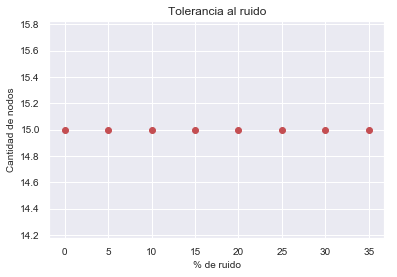

In [204]:
plt.plot(ruido, sizeR, "ro")
plt.xlabel('% de ruido',fontsize=10)
plt.ylabel('Cantidad de nodos',fontsize=10)
plt.title('Tolerancia al ruido',fontsize=12)
plt.show()

<span style="padding-left:3em">**d.** Graficar la performance en función del porcentaje de ruido. Utilizar el 20% de datos inalterados para validación..</span>

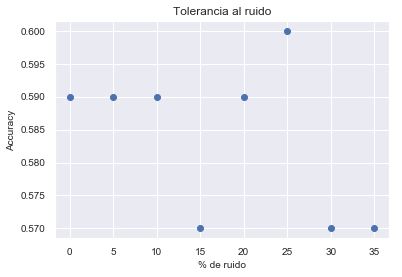

In [205]:
plt.plot(ruido, accuracyR, "bo")
plt.xlabel('% de ruido',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Tolerancia al ruido',fontsize=12)
plt.show()

In [206]:
# Dataset con 35% de ruido
df35 = ind_ruido(X_trainr.copy(), "Interes Mensual", 35)

In [207]:
# Hacemos el árbol para el dtaset con 35% de ruido
dtree35 = DecisionTreeClassifier(max_depth=3, random_state=55)

X35r = df35.copy()
y35r = y_trainr.copy()

dtree35.fit(X35r,y35r)
round(accuracy_score(y_valr, dtree35.predict(X_valr)),2)

0.6

In [208]:
features35 = list(dt3.columns[:-1])
dot_data = StringIO()
export_graphviz(dtree35, out_file="tree35rui.dot",feature_names=features35,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Information Gain, 35% ruido en "Cantidad Cuotas"](tree35rui.png)

<span style="padding-left:3em">**e.** Analizar la tolerancia al ruido sobre los resultados obtenidos..</span>

In [209]:
# Informe

<h3>5. Naive Bayes</h3>

Ejecutar Naive Bayes, informar las probabilidades condicionales y previas. Realizar las validaciones correspondientes.

In [210]:
Xnb = X_dev.copy()
ynb = y_dev.copy()

In [211]:
Xnb_train, Xnb_val, ynb_train, ynb_val = train_test_split(Xnb, ynb, test_size=0.20, random_state=55)

In [212]:
nb = GaussianNB()
nb.fit(Xnb_train,ynb_train)

GaussianNB(priors=None, var_smoothing=1e-09)

<h4>Probabilidades a posteriori, previas y condicionales</h4>

In [213]:
# Calculamos las probabilidades a posteriori
ProbsNB = nb.predict_proba(Xnb_val)
ProbsNB[1:10]

array([[0.76707724, 0.23292276],
       [0.75778459, 0.24221541],
       [0.76976733, 0.23023267],
       [0.69949953, 0.30050047],
       [0.52683252, 0.47316748],
       [0.62370329, 0.37629671],
       [0.64786047, 0.35213953],
       [0.5825688 , 0.4174312 ],
       [0.79711053, 0.20288947]])

In [214]:
dtnb = dt3.copy()
atributos = dtnb.columns

In [215]:
# Calculamos las probabilidades previas
PP = dtnb.groupby('Target').size().div(len(dtnb))
print(PP)

Target
0    0.5
1    0.5
dtype: float64


In [217]:
# Calculamos las probabilidades condicionales
for i in range(len(atributos)-1):
    PC = dtnb.groupby([atributos[i],'Target']).size().div(len(dtnb)).div(PP, axis=0, level='Target')
    print(PC)

Sucursal  Target
0         0         0.057072
          1         0.059553
1         0         0.034739
          1         0.037221
2         0         0.908189
          1         0.903226
dtype: float64
Trimestre Entrega  Target
0                  0         0.287841
                   1         0.322581
1                  0         0.200993
                   1         0.213400
2                  0         0.220844
                   1         0.263027
3                  0         0.290323
                   1         0.200993
dtype: float64
Capital Entregado   Target
1000                0         0.002481
1774                1         0.002481
2000                0         0.007444
                    1         0.007444
3000                0         0.037221
                    1         0.007444
3200                1         0.002481
4000                0         0.002481
                    1         0.002481
5000                0         0.153846
                    1         0.

In [218]:
print(PC)

Sexo  Target
0     0         0.401985
      1         0.434243
1     0         0.598015
      1         0.565757
dtype: float64


![Árbol prof.3, Information Gain, 35% ruido en "Cantidad Cuotas"](encoding.png)

<h4>Performance</h4>

In [219]:
# Evaluamos con el conjunto de validación
predictionsNB = nb.predict(Xnb_val)
print(classification_report(ynb_val,predictionsNB))

              precision    recall  f1-score   support

           0       0.46      0.97      0.62        58
           1       0.71      0.07      0.13        71

   micro avg       0.47      0.47      0.47       129
   macro avg       0.59      0.52      0.38       129
weighted avg       0.60      0.47      0.35       129



In [220]:
# La matriz de confusión
confusion_matrix(ynb_val,predictionsNB)

array([[56,  2],
       [66,  5]], dtype=int64)

In [221]:
# Train Accuracy
acc_trainNB = accuracy_score(ynb_train, nb.predict(Xnb_train))

# Train Recall
rec_trainNB = recall_score(ynb_train, nb.predict(Xnb_train)) 

# Train Precision
prec_trainNB = precision_score(ynb_train, nb.predict(Xnb_train))

In [222]:
# Validation Accuracy
acc_valNB = accuracy_score(ynb_val, nb.predict(Xnb_val))

# Validation Recall
rec_valNB = recall_score(ynb_val, nb.predict(Xnb_val)) 

# Validation Precision
prec_valNB = precision_score(ynb_val, nb.predict(Xnb_val))

In [223]:
# Train ROC AUC Score
roc_trainNB = roc_auc_score(ynb_train, nb.predict(Xnb_train))

In [224]:
# Validation ROC AUC Score
roc_valNB = roc_auc_score(ynb_val, nb.predict(Xnb_val))

In [225]:
# Train 5-Folds Cross Validation
X = Xnb_train.copy()
y = ynb_train.copy()
model = nb
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_trainNB = sum/5
print(acc_list)
print("Accuracy:", round(cv_trainNB,3))

[0.621, 0.573, 0.456, 0.583, 0.524]
Accuracy: 0.551


In [226]:
# Validation 5-Folds Cross Validation
X = Xnb_val.copy()
y = ynb_val.copy()
model = nb
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_valNB = sum/5
print(acc_list)
print("Accuracy:", round(cv_valNB,3))

[0.615, 0.615, 0.5, 0.577, 0.64]
Accuracy: 0.59


In [227]:
performance_train3g = [acc_train3g, rec_train3g, prec_train3g, roc_train3g, cv_train3g]
performance_val3g = [acc_val3g, rec_val3g, prec_val3g, roc_val3g, cv_val3g]
performance_trainNB = [acc_trainNB, rec_trainNB, prec_trainNB, roc_trainNB, cv_trainNB]
performance_valNB = [acc_valNB, rec_valNB, prec_valNB, roc_valNB, cv_valNB]

In [228]:
Medida = ("Accuracy", "Recall (1)", "Precision (1)", "ROC-AUC", "5-folds CV")

Tabla_per1 = pd.DataFrame({"Medida": Medida,
                       "3 Gini Train": performance_train3g, "3 Gini Val": performance_val3g,  
                          "NB Train": performance_trainNB, "NB Val": performance_valNB})

round(Tabla_per1,3)

,Medida,3 Gini Train,3 Gini Val,NB Train,NB Val
0,Accuracy,0.662,0.589,0.538,0.473
1,Recall (1),0.648,0.620,0.103,0.070
2,Precision (1),0.659,0.629,0.703,0.714
3,ROC-AUC,0.662,0.586,0.530,0.518
4,5-folds CV,0.563,0.597,0.551,0.590


<h3>6. Comparación de algoritmos</h3>

Comparar Naive Bayes y árboles de decisión. Para hacerlo usar 5-fold crossvalidation para la exploración de la mejor solución en cada caso. En árboles de decisión determinar qué tamaño de árbol conviene y si conviene utilizar Gini o Information Gain (todo esto con el conjunto de desarrollo y utilizando grid search). Utilizar ROC AUC como métrica.<br>

Testear ambos algoritmos con el conjunto de test independiente (mismo conjunto de test en ambos casos).

<h4>Grid Search</h9>

In [229]:
Xgs = X_dev.copy()
ygs = y_dev.copy()

In [230]:
Xgs_train, Xgs_val, ygs_train, ygs_val = train_test_split(Xgs, ygs, test_size=0.20, random_state=55)

In [231]:
param_grid = {'max_depth': np.arange(3, 20), "criterion": ["entropy", "gini"]}
tree_GS = GridSearchCV(DecisionTreeClassifier(random_state=55), param_grid,scoring="roc_auc")
tree_GS.fit(Xgs_train, ygs_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [232]:
print(tree_GS.best_score_)
print(tree_GS.best_params_)

0.6277576609668124
{'criterion': 'entropy', 'max_depth': 8}


<h4>Decision tree: profundidad 8, Information Gain</h4>

In [233]:
X8 = X_dev.copy()
y8 = y_dev.copy()

In [234]:
X8_train, X8_val, y8_train, y8_val = train_test_split(X8, y8, test_size=0.20, random_state=55)

In [235]:
dtree8e = DecisionTreeClassifier(max_depth=8, criterion = "entropy", random_state=55)
dtree8e.fit(X8_train, y8_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [236]:
# Evaluamos con el conjunto de validación
predictions8e = dtree8e.predict(X8_val)
print(classification_report(y8_val,predictions8e))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        58
           1       0.61      0.61      0.61        71

   micro avg       0.57      0.57      0.57       129
   macro avg       0.56      0.56      0.56       129
weighted avg       0.57      0.57      0.57       129



In [237]:
# La matriz de confusión
confusion_matrix(y8_val,predictions8e)

array([[30, 28],
       [28, 43]], dtype=int64)

In [238]:
# Train Accuracy
acc_train8e = accuracy_score(y8_train, dtree8e.predict(X8_train))

# Train Recall
rec_train8e = recall_score(y8_train, dtree8e.predict(X8_train)) 

# Train Precision
prec_train8e = precision_score(y8_train, dtree8e.predict(X8_train))

In [239]:
# Validation Accuracy
acc_val8e = accuracy_score(y8_val, dtree8e.predict(X8_val))

# Validation Recall
rec_val8e = recall_score(y8_val, dtree8e.predict(X8_val)) 

# Validation Precision
prec_val8e = precision_score(y8_val, dtree8e.predict(X8_val))

In [240]:
# Train ROC AUC Score
roc_train8e = roc_auc_score(y8_train, dtree8e.predict(X8_train))

In [241]:
# Validation ROC AUC Score
roc_val8e = roc_auc_score(y8_val, dtree8e.predict(X8_val))

In [242]:
# Train 5-Folds Cross Validation
X = X8_train.copy()
y = y8_train.copy()
model = dtree8e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_train8e = sum/5
print(acc_list)
print("Accuracy:", round(cv_train8e,3))

[0.534, 0.592, 0.553, 0.553, 0.563]
Accuracy: 0.559


In [243]:
# Validation 5-Folds Cross Validation
X = X8_val.copy()
y = y8_val.copy()
model = dtree8e
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_val8e = sum/5
print(acc_list)
print("Accuracy:", round(cv_val8e,3))

[0.538, 0.615, 0.462, 0.385, 0.52]
Accuracy: 0.504


<h4>Tabla comparativa de todos los árboles</h4>

In [244]:
performance_train8e = [acc_train8e, rec_train8e, prec_train8e, roc_train8e, cv_train8e]
performance_val8e = [acc_val8e, rec_val8e, prec_val8e, roc_val8e, cv_val8e]

In [245]:
Medida = ("Accuracy", "Recall (1)", "Precision (1)", "ROC-AUC", "5-folds CV")

Tabla_per2 = pd.DataFrame({"Medida": Medida,
                        #"3 Gini Train": performance_train3g, "6 Gini Train": performance_train6g, "Ultd. Gini Train": performance_trainUg,
                        #"3 IG Train": performance_train3e, "6 IG Train": performance_train6e, "8 Entropy Train": performance_train9e, "Ultd. IG Train": performance_trainUe,
                        "3 Gini Val": performance_val3g,  "6 Gini Val": performance_val6g, "Ultd. Gini Val": performance_valUg,
                        "3 IG Val": performance_val3e, "6 IG Val": performance_val6e, "8 IG Val": performance_val8e, "Ultd. IG Val": performance_valUe})

round(Tabla_per2,3)

,Medida,3 Gini Val,6 Gini Val,Ultd. Gini Val,3 IG Val,6 IG Val,8 IG Val,Ultd. IG Val
0,Accuracy,0.589,0.581,0.527,0.589,0.597,0.566,0.543
1,Recall (1),0.620,0.606,0.563,0.620,0.606,0.606,0.606
2,Precision (1),0.629,0.623,0.571,0.629,0.642,0.606,0.581
3,ROC-AUC,0.586,0.579,0.523,0.586,0.596,0.561,0.536
4,5-folds CV,0.597,0.504,0.566,0.597,0.543,0.504,0.535


In [246]:
Medida = ("Accuracy", "Recall (1)", "Precision (1)", "ROC-AUC", "5-folds CV")

Tabla_per3 = pd.DataFrame({"Medida": Medida,
                           "3 Gini Val": performance_val3g,
                           "8 IG Val": performance_val8e,
                           "NB Val": performance_valNB})

round(Tabla_per3,3)

,Medida,3 Gini Val,8 IG Val,NB Val
0,Accuracy,0.589,0.566,0.473
1,Recall (1),0.620,0.606,0.070
2,Precision (1),0.629,0.606,0.714
3,ROC-AUC,0.586,0.561,0.518
4,5-folds CV,0.597,0.504,0.590


<h4>Testeamos con nuestro set Test</h4>

In [247]:
X_train = X_dev.copy()
y_train = y_dev.copy()

X_testf = X_testf.copy()
y_testf = y_testf.copy()

<h5>Árbol profundidad 3, Gini</h5>

In [248]:
# Lo entrenamos con el 80% de los datos
dtree3g_test = DecisionTreeClassifier(max_depth=3, random_state=55)
dtree3g_test.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [249]:
# Lo evaluamos con el 20% para test
pred_test3g = dtree3g_test.predict(X_testf)
print(classification_report(y_testf,pred_test3g))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        83
           1       0.60      0.48      0.54        79

   micro avg       0.59      0.59      0.59       162
   macro avg       0.59      0.59      0.59       162
weighted avg       0.59      0.59      0.59       162



In [250]:
# La matriz de confusión
confusion_matrix(y_testf,pred_test3g)

array([[58, 25],
       [41, 38]], dtype=int64)

In [251]:
# Accuracy
acc_test3g = accuracy_score(y_testf,pred_test3g)

# Recall
rec_test3g = recall_score(y_testf,pred_test3g) 

# Precision
prec_test3g = precision_score(y_testf,pred_test3g)

# ROC AUC Score
roc_test3g = roc_auc_score(y_testf,pred_test3g)

In [252]:
# 5-Folds Cross Validation
X = X_testf.copy()
y = y_testf.copy()
model = dtree3g_test
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_test3g = sum/5
print(acc_list)
print("Accuracy:", round(cv_test3g,3))

[0.515, 0.485, 0.5, 0.562, 0.344]
Accuracy: 0.481


<h5>Árbol profundidad 8, Information Gain</h5>

In [253]:
# Lo entrenamos con el 80% de los datos
dtree8e_test = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=55)
dtree8e_test.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [254]:
# Lo evaluamos con el 20% para test
pred_test8e = dtree8e_test.predict(X_testf)
print(classification_report(y_testf,pred_test8e))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        83
           1       0.78      0.86      0.82        79

   micro avg       0.81      0.81      0.81       162
   macro avg       0.82      0.82      0.81       162
weighted avg       0.82      0.81      0.81       162



In [255]:
# La matriz de confusión
confusion_matrix(y_testf,pred_test8e)

array([[64, 19],
       [11, 68]], dtype=int64)

In [256]:
# Accuracy
acc_test8e = accuracy_score(y_testf,pred_test8e)

# Recall
rec_test8e = recall_score(y_testf,pred_test8e) 

# Precision
prec_test8e = precision_score(y_testf,pred_test8e)

# ROC AUC Score
roc_test8e = roc_auc_score(y_testf,pred_test8e)

In [257]:
# 5-Folds Cross Validation
X = X_testf.copy()
y = y_testf.copy()
model = dtree8e_test
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_test8e = sum/5
print(acc_list)
print("Accuracy:", round(cv_test8e,3))

[0.545, 0.333, 0.656, 0.406, 0.562]
Accuracy: 0.501


In [258]:
dot_data = StringIO()
export_graphviz(dtree8e, out_file="tree8e.dot",feature_names=features35,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

<h5>Naive Bayes</h5>

In [259]:
# Lo entrenamos con el 80% de los datos
nb_test = GaussianNB()
nb_test.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [260]:
# Lo evaluamos con el 20% para test
pred_testNB = nb_test.predict(X_testf)
print(classification_report(y_testf,pred_testNB))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68        83
           1       0.80      0.05      0.10        79

   micro avg       0.53      0.53      0.53       162
   macro avg       0.66      0.52      0.39       162
weighted avg       0.66      0.53      0.40       162



In [261]:
# La matriz de confusión
confusion_matrix(y_testf,pred_testNB)

array([[82,  1],
       [75,  4]], dtype=int64)

In [262]:
# Accuracy
acc_testNB = accuracy_score(y_testf,pred_testNB)

# Recall
rec_testNB = recall_score(y_testf,pred_testNB) 

# Precision
prec_testNB = precision_score(y_testf,pred_testNB)

# ROC AUC Score
roc_testNB = roc_auc_score(y_testf,pred_testNB)

In [263]:
# 5-Folds Cross Validation
X = X_testf.copy()
y = y_testf.copy()
model = nb_test
kf = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
acc_list = []
for train, test in kf.split(X):
    X_train = np.array(X)[train]
    X_test = np.array(X)[test]
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = float(accuracy_score(y_test, predictions))
    acc_list.append(round(acc,3))
    sum += acc
cv_testNB = sum/5
print(acc_list)
print("Accuracy:", round(cv_testNB,3))

[0.727, 0.485, 0.688, 0.594, 0.438]
Accuracy: 0.586


<h5>Tabla comparativa de los modelos testeados</h5>

In [264]:
performance_test3g = [acc_test3g, rec_test3g, prec_test3g, roc_test3g, cv_test3g]
performance_test8e = [acc_test8e, rec_test8e, prec_test8e, roc_test8e, cv_test8e]
performance_testNB = [acc_testNB, rec_testNB, prec_testNB, roc_testNB, cv_testNB]

In [265]:
Medida = ("Accuracy", "Recall (1)", "Precision (1)", "ROC-AUC", "5-folds CV")

Tabla_per4 = pd.DataFrame({"Medida": Medida, "3 Gini Test": performance_test3g, "8 IG Test": performance_test8e, "NB Test": performance_testNB})

round(Tabla_per4,3)

,Medida,3 Gini Test,8 IG Test,NB Test
0,Accuracy,0.593,0.815,0.531
1,Recall (1),0.481,0.861,0.051
2,Precision (1),0.603,0.782,0.800
3,ROC-AUC,0.590,0.816,0.519
4,5-folds CV,0.481,0.501,0.586


<h4>Gráfico ROC-AUC para los tres modelos</h4>

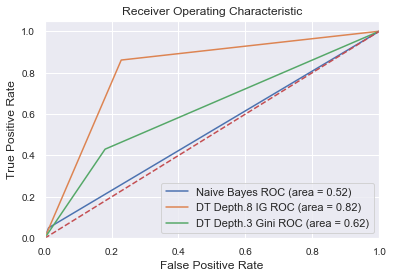

In [266]:
# Modelos para graficar
models = [
{
    'label': 'Naive Bayes',
    'model': nb_test,
},
{
    'label': 'DT Depth.8 IG',
    'model':dtree8e_test,
},
{
    'label': 'DT Depth.3 Gini',
    'model':dtree3g_test,       
}
]

sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

# Iteramos sobre los modelos
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_testf) # predict the test data  

# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_testf, y_pred)    

# Calculate Area under the curve to display on the plot
    auc = metrics.auc(fpr, tpr)

# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))   

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

<h5>Gráfico de los árboles testeados</h5>

Árbol profundidad 3, Gini

In [ ]:
dot_data = StringIO()
export_graphviz(dtree3g_test, out_file="tree3g_test.dot",feature_names=features35,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.3, Test](tree3g_test.png)

Árbol profundidad 8, Information Gain

In [ ]:
dot_data = StringIO()
export_graphviz(dtree8e_test, out_file="tree8e_test.dot",feature_names=features35,filled=True,rounded=True,impurity=False,class_names=["Cumplidor","Deudor"],proportion=True,precision=2)

![Árbol prof.8, test](tree8e_test.png)